<a href="https://colab.research.google.com/github/christophersingh/Airtime/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Imports%20Crude%20Oil.csv')
df['date'] = df['Unnamed: 0'].apply(lambda x: x.strip())
df['date'] = df['date'].apply(lambda x: x.replace(' ', '-').lower())
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.rename({'Imports of all grades of crude oil from World to Total U.S. (US), Monthly (thousand barrels)': 'Barrels of Oil'}, axis=1, inplace=True)
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df.set_index('date',inplace=True)
df.index = pd.to_datetime(df.index)
df

,Barrels of Oil
date,
2009-01-01,317275
2009-02-01,262339
2009-03-01,303897
2009-04-01,285934
2009-05-01,281147
...,...
2020-09-01,161926
2020-10-01,164494
2020-11-01,168655


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2009-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Barrels of Oil  145 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


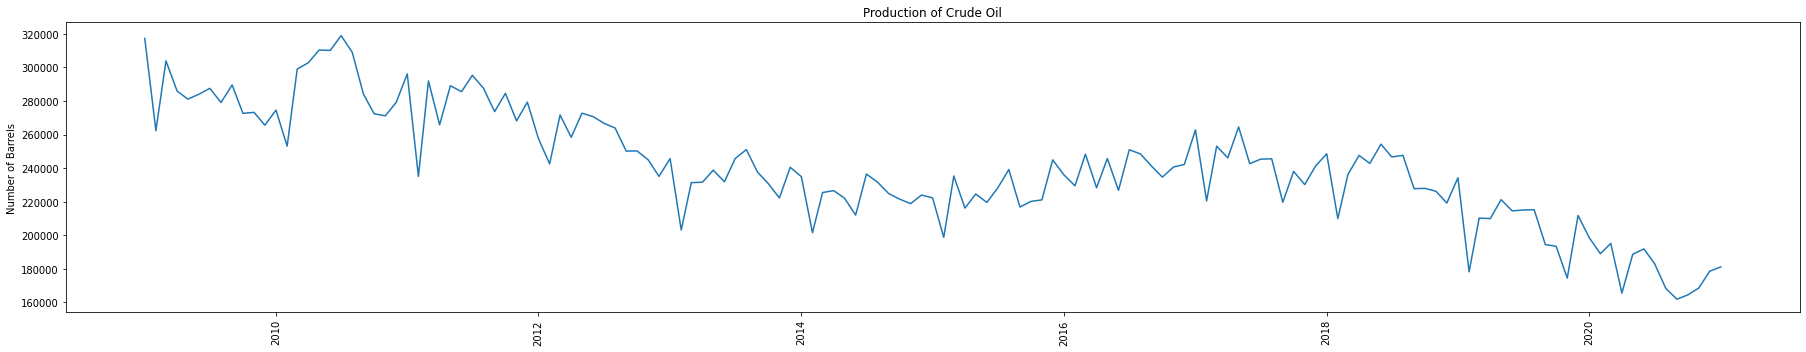

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(25,5))
plt.plot(df.index, df['Barrels of Oil'])
plt.title('Production of Crude Oil')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Number of Barrels');
plt.show()

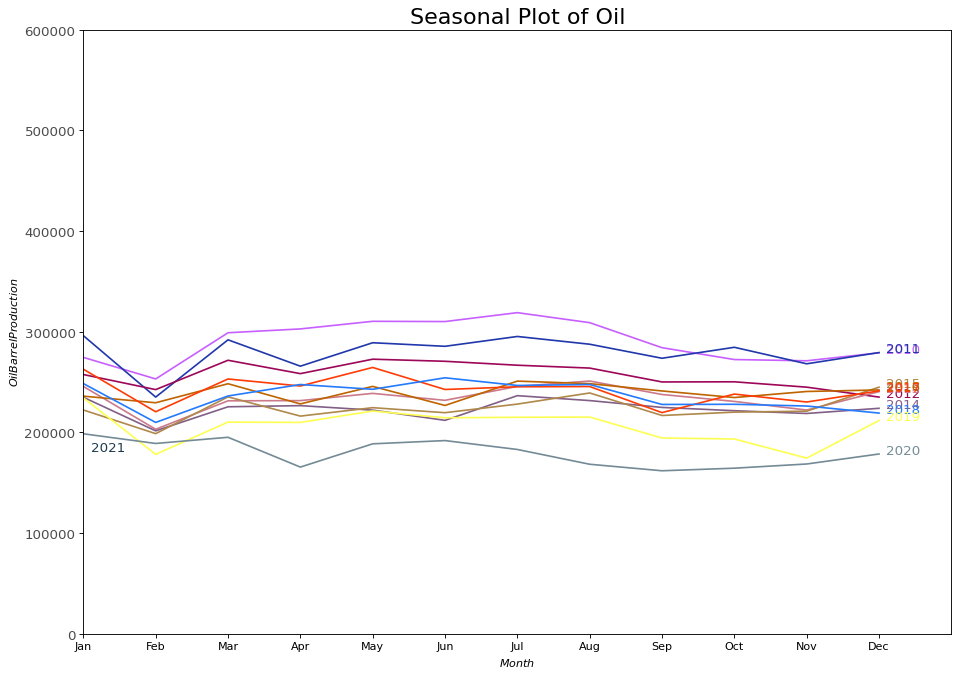

In [ ]:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(14,10), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Barrels of Oil', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Barrels of Oil'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(0, 12), ylim=(0, 600000), ylabel='$Oil Barrel Production$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Oil", fontsize=20)
plt.show()

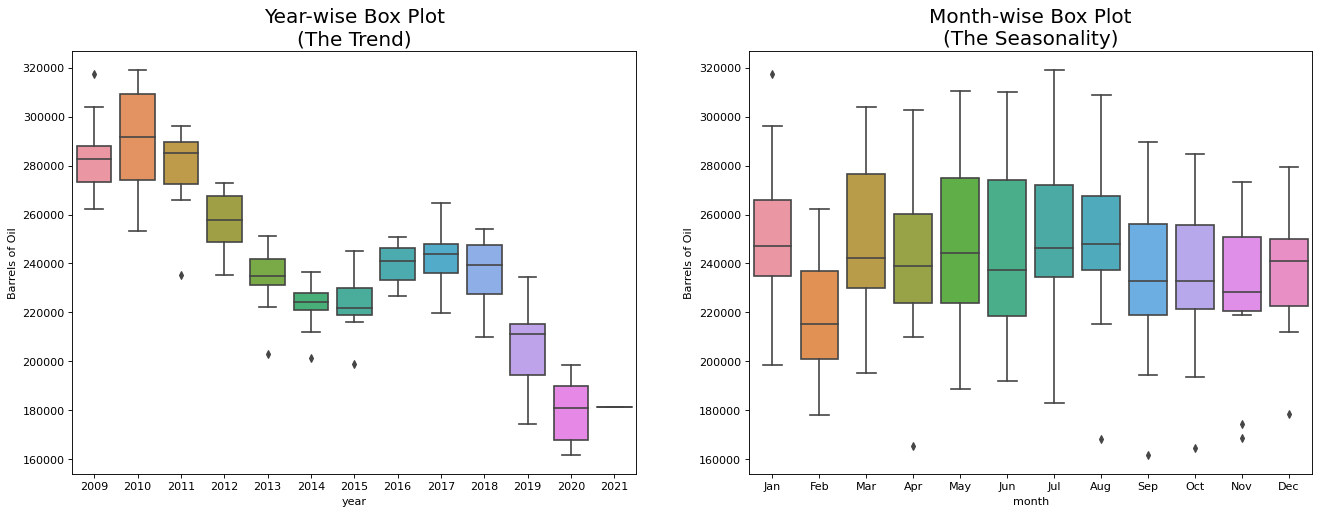

In [ ]:
years = df['year'].unique()
import seaborn as sns
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Barrels of Oil', data=df, ax=axes[0])
sns.boxplot(x='month', y='Barrels of Oil', data=df.loc[~df.year.isin([1991, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


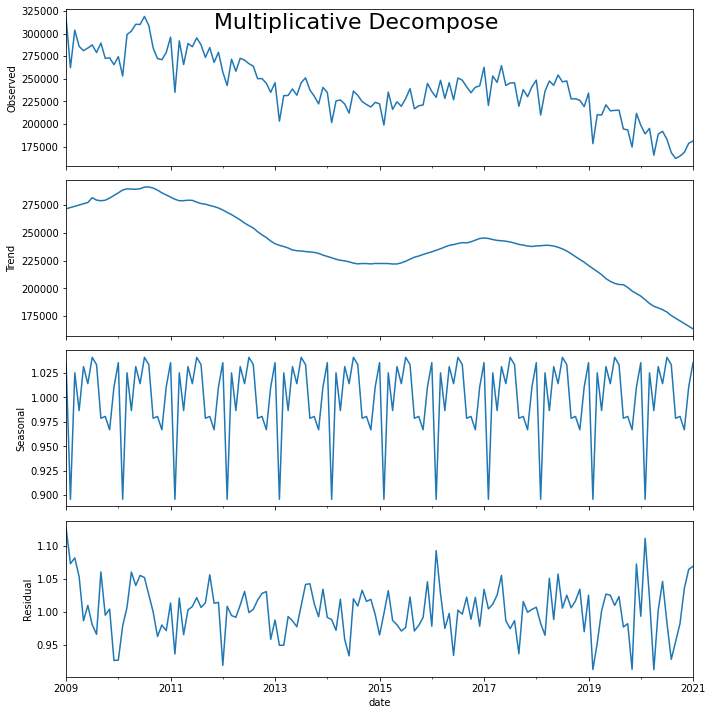

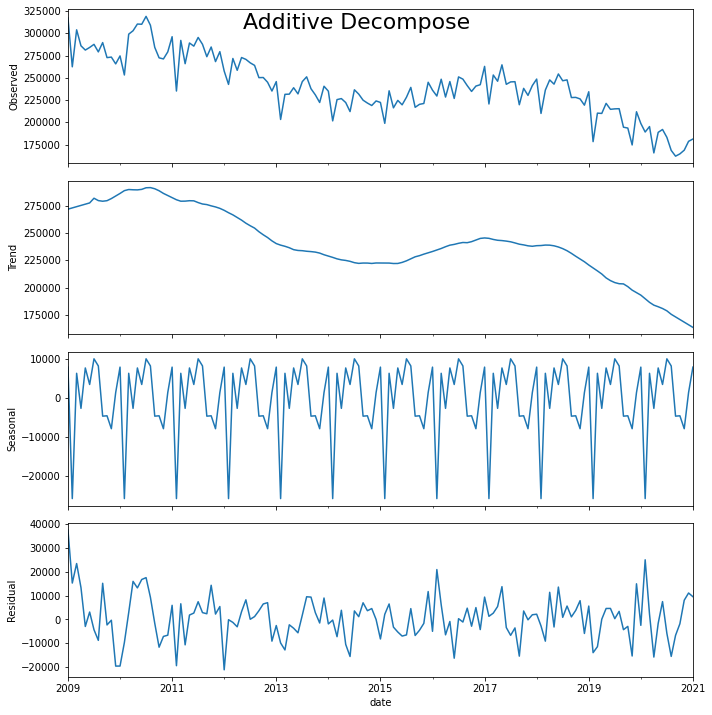

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['Barrels of Oil'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Barrels of Oil'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
date,,,,
2009-01-01,1.035493,271765.528943,1.127442,317275
2009-02-01,0.895956,272904.252574,1.072917,262339
2009-03-01,1.025094,274042.976204,1.081792,303897
2009-04-01,0.986578,275181.699835,1.053209,285934
2009-05-01,1.031477,276320.423465,0.986418,281147
...,...,...,...,...
2020-09-01,0.978705,173229.024476,0.955090,161926
2020-10-01,0.980577,170837.156031,0.981943,164494
2020-11-01,0.966985,168445.287587,1.035430,168655


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df['Barrels of Oil'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.04326340691098666
p-value: 0.9619670163525729
Critial Values:
   1%, -3.481281802271349
Critial Values:
   5%, -2.883867891664528
Critial Values:
   10%, -2.5786771965503177


In [ ]:
# KPSS Test
result = kpss(df['Barrels of Oil'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.843092
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
